# Projet Kit Data Science 

In [100]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
import numpy as np 
import os
import urllib.request
import datetime
import locale
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import geopandas
import re 

## Récupération des données 

Les données du Vendée Globe sont disponibles via le site: https://www.vendeeglobe.org/fr


In [101]:
url = 'https://www.vendeeglobe.org'

### Récupération des skippers et des voiliers en lice 

Liste des skippers : https://www.vendeeglobe.org/fr

In [102]:
#--------Récupération des balises HTML--------#
r = requests.get(url)
soup = BeautifulSoup(r.content)

In [103]:
skippers = []
boats = []
for span_tag_skippers in soup.findAll('span', attrs={'class': 'skippers__name'}): 
    skippers.append(span_tag_skippers.text)
    
for span_tag_boats in soup.findAll('span', attrs={'class': 'skippers__boat'}):
    boats.append(span_tag_boats.text)

In [104]:
#liste des skippers en compétition 
print(skippers)

['Fabrice AMEDEO', 'Romain ATTANASIO', 'Alexia BARRIER', 'Yannick BESTAVEN', 'Jérémie BEYOU', 'Arnaud BOISSIÈRES', 'Louis BURTON', 'Didac COSTA', 'Manuel COUSIN', 'Clarisse CREMER', 'Charlie DALIN', 'Sam DAVIES', 'Sébastien DESTREMAU', 'Benjamin DUTREUX', 'Kevin ESCOFFIER', 'Clément GIRAUD', 'Pip HARE', 'Boris HERRMANN', 'Ari HUUSELA', 'Isabelle JOSCHKE', 'Jean LE CAM', 'Stéphane LE DIRAISON', 'Miranda MERRON', 'Giancarlo PEDOTE', 'Alan  ROURA', 'Thomas RUYANT', 'Damien SEGUIN', 'Kojiro SHIRAISHI', 'Sébastien SIMON', 'Maxime SOREL', 'Alex THOMSON', 'Armel TRIPON', 'Nicolas TROUSSEL']


In [105]:
#liste des bateaux en liste 
print(boats)

['NEWREST - ART & FENÊTRES', 'PURE - Best Western®', 'TSE -  4MYPLANET', 'Maître CoQ IV', 'CHARAL', 'LA MIE CÂLINE - ARTISANS ARTIPÔLE', 'BUREAU VALLEE 2', 'ONE PLANET ONE OCEAN', 'GROUPE SÉTIN', 'BANQUE POPULAIRE X', 'APIVIA', 'INITIATIVES-COEUR', 'MERCI', 'OMIA - WATER FAMILY ', 'PRB', 'Compagnie du Lit / Jiliti', 'MEDALLIA', 'SEAEXPLORER - YACHT CLUB DE MONACO', 'STARK', 'MACSF', 'Yes We Cam!', 'TIME FOR OCEANS', 'CAMPAGNE DE FRANCE', 'PRYSMIAN GROUP', 'LA FABRIQUE', 'LinkedOut', 'GROUPE APICIL', 'DMG MORI Global One', 'ARKEA PAPREC', 'V and B-MAYENNE', 'HUGO BOSS', "L'OCCITANE EN PROVENCE", "CORUM L'EPARGNE"]


In [106]:
couple = {}
for i in range(len(skippers)): 
    if skippers[i] == 'Sam DAVIES':
        couple ['Samantha ravies'] = boats[i].capitalize()
    elif skippers[i] == 'Alan  ROURA':
        couple ['Alan roura'] = boats[i].capitalize()
    else: 
        couple [skippers[i].capitalize()] = boats[i].capitalize()

In [107]:
for skipper, boat in couple.items(): 
    print('Le skipper', skipper, 'est associé au voilier', boat)

Le skipper Fabrice amedeo est associé au voilier Newrest - art & fenêtres
Le skipper Romain attanasio est associé au voilier Pure - best western®
Le skipper Alexia barrier est associé au voilier Tse -  4myplanet
Le skipper Yannick bestaven est associé au voilier Maître coq iv
Le skipper Jérémie beyou est associé au voilier Charal
Le skipper Arnaud boissières est associé au voilier La mie câline - artisans artipôle
Le skipper Louis burton est associé au voilier Bureau vallee 2
Le skipper Didac costa est associé au voilier One planet one ocean
Le skipper Manuel cousin est associé au voilier Groupe sétin
Le skipper Clarisse cremer est associé au voilier Banque populaire x
Le skipper Charlie dalin est associé au voilier Apivia
Le skipper Samantha ravies est associé au voilier Initiatives-coeur
Le skipper Sébastien destremau est associé au voilier Merci
Le skipper Benjamin dutreux est associé au voilier Omia - water family 
Le skipper Kevin escoffier est associé au voilier Prb
Le skipper Cl

### Récupération des fiches techniques pour chacun des voiliers 

In [108]:
#--------Récupération des url des différents skippers -------#
 
url_data_skippers = []
for a_tag_skippers in soup.findAll('a', attrs={'class': 'skippers__slide'}): 
    url_data_skippers.append(a_tag_skippers.attrs['href'])

In [109]:
print(url_data_skippers)

['/fr/skippers/93/fabrice-amedeo', '/fr/skippers/110/romain-attanasio', '/fr/skippers/100/alexia-barrier', '/fr/skippers/91/yannick-bestaven', '/fr/skippers/103/jeremie-beyou', '/fr/skippers/88/arnaud-boissieres', '/fr/skippers/106/louis-burton', '/fr/skippers/123/didac-costa', '/fr/skippers/92/manuel-cousin', '/fr/skippers/95/clarisse-cremer', '/fr/skippers/105/charlie-dalin', '/fr/skippers/97/sam-davies', '/fr/skippers/117/sebastien-destremau', '/fr/skippers/112/benjamin-dutreux', '/fr/skippers/89/kevin-escoffier', '/fr/skippers/114/clement-giraud', '/fr/skippers/120/pip-hare', '/fr/skippers/109/boris-herrmann', '/fr/skippers/124/ari-huusela', '/fr/skippers/102/isabelle-joschke', '/fr/skippers/116/jean-le-cam', '/fr/skippers/94/stephane-le-diraison', '/fr/skippers/104/miranda-merron', '/fr/skippers/96/giancarlo-pedote', '/fr/skippers/99/alan-roura', '/fr/skippers/113/thomas-ruyant', '/fr/skippers/111/damien-seguin', '/fr/skippers/119/kojiro-shiraishi', '/fr/skippers/90/sebastien-simo

Les URL des différents skippers, nous permettent d'accéder aux différentes fiches techniques des voiliers associés à ces skippers. 

In [110]:
r = requests.get(url + url_data_skippers[0])
soup = BeautifulSoup(r.content)
test = soup.find('ul', {'class': "skipper-boat-list__specs-list l-unlist"})

#-----Récupération des caractéristiques définissant chaque navire---#
boat_features = []

for li_tag in test.find_all('li'): 
    index = li_tag.text.find(':')
    boat_features.append(li_tag.text[ :index - 1])

print(boat_features)

['Numéro de voile', 'Anciens noms du bateau', 'Architecte', 'Chantier', 'Date de lancement', 'Longueur', 'Largeur', "Tirant d'eau", 'Déplacement (poids)', 'Nombre de dérives', 'Hauteur mât', 'Voile quille', 'Surface de voiles au près', 'Surface de voiles au portant']


In [111]:
#--------Récupération des caractéristiques spécifiques des voiliers-------#
dico_boat_features = {}

for url_skipper in url_data_skippers:
    
    url_skipper_total =  url + url_skipper
    r = requests.get(url_skipper_total)
    soup = BeautifulSoup(r.content)
    test = soup.find('ul', {'class': "skipper-boat-list__specs-list l-unlist"})
    specific_boat_features = []
    cpt =0
    for li_tag in test.find_all('li'): 
        
        
        
        index = li_tag.text.find(':')
        if (li_tag.text[ :index-1] != boat_features[cpt]):
            specific_boat_features.append(np.nan)
            cpt = cpt + 1
            
        specific_boat_features.append(li_tag.text[index + 2 : ].lower())
        cpt = cpt + 1
        
    nom = soup.find('p', {'class': "skipper-boat-list__title"})
    dico_boat_features[nom.text] = specific_boat_features
    

In [112]:
df_boats_features = pd.DataFrame(dico_boat_features, index = boat_features)

In [113]:
df_new_line = pd.DataFrame([skippers], columns =  boats, index = ['Skipper'])

In [114]:
df_boats_features = pd.concat([df_boats_features,df_new_line])

In [115]:
#Fiches techniques des différents voiliers dans un dataframe
df_boats_features

,NEWREST - ART & FENÊTRES,PURE - Best Western®,TSE - 4MYPLANET,Maître CoQ IV,CHARAL,LA MIE CÂLINE - ARTISANS ARTIPÔLE,BUREAU VALLEE 2,ONE PLANET ONE OCEAN,GROUPE SÉTIN,BANQUE POPULAIRE X,...,PRYSMIAN GROUP,LA FABRIQUE,LinkedOut,GROUPE APICIL,DMG MORI Global One,ARKEA PAPREC,V and B-MAYENNE,HUGO BOSS,L'OCCITANE EN PROVENCE,CORUM L'EPARGNE
Numéro de voile,fra 56,fra 49,fra72,17,08,fra 14,18,esp 33,fra 71,fra30,...,ita 06,sui07,NaN,fra1000,jpn 11,4,fra53,gbr 99,2,fra 6
Anciens noms du bateau,"no way back, vento di sardegna","gitana eighty, synerciel, newrest-matmut","famille mary-etamine du lys, initiatives coeur...",safran 2 - des voiles et vous,NaN,"ecover3, président, gamesa, kilcullen voyager-...",banque populaire viii,kingfisher - educacion sin fronteras - forum m...,"paprec-virbac2, estrella damm, we are water, l...",macif - sma,...,saint-michel - virbac,"brit air, votre nom autour du monde, macsf",verdier,"comme un seul homme, dcns",NaN,NaN,"le souffle du nord, groupe bel",NaN,NaN,NaN
Architecte,vplp/verdier,bruce farr design,marc lombard,verdier - vplp,vplp,owen clarke design llp - clay oliver,verdier - vplp,owen clarke design,bruce farr yacht design,verdier - vplp,...,vplp - verdier,groupe finot-conq,NaN,groupe finot-conq,vplp,juan kouyoumdjian,verdier - vplp,vplp - alex thomson racing (led by pete hobson),samuel manuard,juan kouyoumdjian
Chantier,persico marine,southern ocean marine (nouvelle zélande),mag france,cdk technologies,cdk technologies,hakes marine - mer agitée,cdk technologies,martens yachts,southern ocean marine (nouvelle-zélande),cdk - mer agitée,...,multiplast,multiplast,persico,multiplast,multiplast,cdk technologies / assemblage : team arkea paprec,"indiana yachting (scarlino, italie)",carrington boats,black pepper©,cdk technologies - mer agitée
Date de lancement,01 août 2015,08 mars 2007,01 mars 1998,12 mars 2015,18 août 2018,03 août 2007,09 juin 2015,02 février 2000,02 février 2007,01 mars 2011,...,02 avril 2015,01 août 2007,03 septembre 2019,10 août 2008,05 septembre 2019,19 juillet 2019,07 septembre 2007,15 août 2019,31 janvier 2020,15 mai 2020
Longueur,"18,28 m","18,28m","18,28m","18,28 m","18,28 m","18,28 m","18,28 m","18,28 m","18,28 m","18,28 m",...,"18,28 m","18,28 m","18,28 m","18,28 m","18,28 m","18,28 m","18,28 m","18,28 m","18,28 m","18,28 m"
Largeur,"5,85 m","5,80m","5,54m","5,80 m","5,85 m","5,65 m","5,80 m","5,30 m","5,80 m","5,70 m",...,"5,80 m","5,90 m","5,85 m","5,85 m","5,85 m","5,70 m","5,50 m","5,40 m","5,50 m","5,70 m"
Tirant d'eau,"4,50 m","4,50m","4,50m","4,50 m","4,50 m","4,50 m","4,50 m","4,50 m","4,50 m","4,5 m",...,"4,5 m","4,50 m","4,50 m","4,50 m","4,50 m","4,50 m","4,50 m","4,50 m","4,50 m","4,50 m"
Déplacement (poids),7 t,9t,9t,8 t,8t,"7,9 tonnes","7,6 t","8,9 t",9 t,"7,7 t",...,8 t,nc,8 t,"8,5 t",8 t,8 t,"7,7 t","7,7 t","7,8 t","7,9 t"
Nombre de dérives,foils,2,2,foils,foils,foils,foils,2,2 asymétriques,2,...,foils,foils,foils,2,foils,foiler,2,foils,foils,foils


### Récupération des classements 

Le classement est updaté plusieurs fois par jour. Pour éviter de télécharger manuellement les différents documents excel, il a fallu implémenter une petite "fonction" permettant de télécharger tous les fichiers. 

In [116]:
#----------Récupération des URL des différents classements-------#
url_classement = 'https://www.vendeeglobe.org/fr/classement'
r = requests.get(url_classement)
soup = BeautifulSoup(r.content)


dates = []
for option_tag in soup.findAll('option'): 
    for key, date in option_tag.attrs.items():
        if len(date) == 0:
            continue 
        dates.append(date)

url_classement = 'https://www.vendeeglobe.org/download-race-data/vendeeglobe_'
url_classements = []
for date in dates : 
    url_classements.append(url_classement + str(date)+'.xlsx')



**Attention**:  dans la variable "path", j'ai intégré l'adresse où j'enregistre localement tous les fichiers Excel. 

**Je vous invite donc à modifier cette variable pour que le code fonctionne bien. Merci !**

In [117]:
#----------Récupération des fichiers Excel---------#

"""
Récupération des données : 
pour éviter les erreurs de chemins, on enregistre les différents excels là où le Jupyter Notebook est enregistré
Dans mon cas, le répertoire est le suivant (cf.variable path).

Il faut changer le nom de path
"""

path = '/Users/karenhubert/Desktop/MS IA/MDI 721 Kit Data Science/Projet'



cpt = 0
for url in url_classements : 
    
    path_file = path + '/'+ str(dates[cpt]) +'.xlsx'
    if (os.path.exists(path_file)):
        continue
        
    else: 
        ret = requests.head(url)
        if(ret.status_code>400): 
            continue
        else: 
            urllib.request.urlretrieve(url, url[-20:])
    cpt = cpt +1
    

## Nettoyage des données 


### Nettoyage des tous les classements transformés en dataframe

**Attention** : je réutilise la variable path ici. Veuillez la modifier pour le bon fonctionnement du code. Merci ! 

In [118]:
#---------Récupération des noms des fichiers excel téléchargés------#
path = '/Users/karenhubert/Desktop/MS IA/MDI 721 Kit Data Science/Projet'
files = os.listdir(path)
files_xls = [f for f in files if f[-4:] == 'xlsx']

In [119]:
#-----Récupération des noms des colonnes du fichier Excel après nettoyage---#

#Prise au hasard d'un dossier excel _ ici celui d'index 8
df_test = pd.read_excel(files_xls[8])


#Nommage des différentes colonnes du dataset
df_test.columns = range(df_test.shape[1])

#Suppression de la premiere colonne 
del df_test [0]

#Suppression des lignes qui n'apportent aucune information NaN
ligne_to_delete = [0,37,38,39,40]
df_test.drop(ligne_to_delete, inplace = True)

# Création des nouvelles colonnes 
df_test.iloc[2, 0:3] = df_test.iloc[1, 0:3]
df_test.iloc[2, 18:20] = df_test.iloc[1, 18:20]
df_test.iloc[2, 0] = df_test.iloc[0, 0]
df_test.drop(1, inplace = True)
"""
for i in range(6,10):
    df_test.iloc[1 , i] = df_test.iloc[1 , i] + " Depuis 30min"

for i in range(10,14):
    df_test.iloc[1 , i] = df_test.iloc[1 , i] + " Depuis le dernier classement"
    
for i in range(14,18):
    df_test.iloc[1 , i] = df_test.iloc[1 , i] + " Depuis 24h " 
"""

df_test.drop(2, inplace = True)

df_test.columns = df_test.iloc[0,]

df_test.drop(3, inplace = True)

In [120]:
dico_columns =  {}
for i in range (len(df_test.columns)):  
    dico_columns[i] = df_test.columns[i]

print(dico_columns)

{0: 'Classement du samedi 21 novembre 2020 à 05h00 FR', 1: 'Nat. / Voile\nNat. / Sail', 2: 'Skipper / Bateau\nSkipper / crew', 3: 'Heure FR\nHour FR', 4: 'Latitude\nLatitude', 5: 'Longitude\nLongitude', 6: 'Cap\nHeading', 7: 'Vitesse\nSpeed', 8: 'VMG\nVMG', 9: 'Distance\nDistance', 10: 'Cap\nHeading', 11: 'Vitesse\nSpeed', 12: 'VMG\nVMG', 13: 'Distance\nDistance', 14: 'Cap\nHeading', 15: 'Vitesse\nSpeed', 16: 'VMG\nVMG', 17: 'Distance\nDistance', 18: 'DTF', 19: 'DTL'}


In [121]:
list_nom_columns = []
for i in range(1,18):
    list_nom_columns.append(dico_columns[i] [:dico_columns[i].find('\n')])
    #dico_columns.values()
    
for i in range(5,9):
    list_nom_columns[i] = list_nom_columns[i] + " depuis 30min"

for i in range(9,13):
    list_nom_columns[i] = list_nom_columns[i] + " depuis le dernier classement"
    
for i in range(13,17):
    list_nom_columns[i] = list_nom_columns[i]  + " depuis 24h " 
    
list_nom_columns  = list_nom_columns + [dico_columns[18], dico_columns[19]]
print(list_nom_columns)

['Nat. / Voile', 'Skipper / Bateau', 'Heure FR', 'Latitude', 'Longitude', 'Cap depuis 30min', 'Vitesse depuis 30min', 'VMG depuis 30min', 'Distance depuis 30min', 'Cap depuis le dernier classement', 'Vitesse depuis le dernier classement', 'VMG depuis le dernier classement', 'Distance depuis le dernier classement', 'Cap depuis 24h ', 'Vitesse depuis 24h ', 'VMG depuis 24h ', 'Distance depuis 24h ', 'DTF', 'DTL']


In [122]:
#----Fonction key_list_word----#

# fonction qui retourne la clé i.e. l'index des colonnes 
#qui commence par "word"

def key_list_word(word): 
    key_list = [k for (k, val) in dico_columns.items() if val.startswith(word)]
    return key_list 


**Attention** : je réutilise la variable path ici. Veuillez la modifier pour le bon fonctionnement du code. Merci ! 

In [123]:
# -------Création de dataframes à partir des fichiers Excel --------
path = '/Users/karenhubert/Desktop/MS IA/MDI 721 Kit Data Science/Projet'
files = os.listdir(path)
files_xls = [f for f in files if f[-4:] == 'xlsx']
dico_df_ranking = {}


for f in files_xls :
    
    date_object = datetime.datetime.strptime( f[:f.find('.')], '%Y%m%d_%H%M%S')
    
    
    df = pd.read_excel(f)
    #nettoyage du df temporaire 
    
    ##Nommage des différentes colonnes du dataset
    df.columns = range(df.shape[1])

    ##Suppression de la premiere colonne 
    del df [0]

    ##Suppression des lignes qui n'apportent aucune information NaN
    ligne_to_delete = [0,37,38,39,40]
    df.drop(ligne_to_delete, inplace = True)

    ##Création des nouvelles colonnes 
    df.iloc[2, 0:3] = df.iloc[1, 0:3]
    df.iloc[2, 18:20] = df.iloc[1, 18:20]
    df.iloc[2, 0] = df.iloc[0, 0]
    df.drop(1, inplace = True)
    
    
    df.drop(2, inplace = True)

    df.columns = df.iloc[0,]

    df.drop(3, inplace = True)
    
    
    df.columns = [df.columns[0]] + list_nom_columns

    words = ['Cap', 'Vitesse', 'VMG', 'Distance', 'DTF', 'DTL']
    
    #Vérification si une liste est vide 
    #pour les voiliers/skippers ayant abandonné 

    if(df.isnull().values.any()):
        df.fillna('00000', inplace = True)
    
    for word in words : 
        list_index = key_list_word(word)
        for index in list_index: 
            if word ==  'Cap':  
                df.iloc[:,index] = df.iloc[:,index].apply(lambda x : int(str(x)[:-1]))
            if (word ==  'Vitesse') or (word == 'VMG'):  
                df.iloc[:,index] = df.iloc[:,index].apply(lambda x : float(str(x) [:-3]))
            if ((word ==  'Distance') or (word == 'DTF') or (word == 'DTL')):  
                df.iloc[:,index] = df.iloc[:,index].apply(lambda x : float(str(x) [:-2]))
            
    
    
    df = df.reset_index(drop=True)
    
    df['Skipper'] = df['Skipper / Bateau'].apply(lambda x : x[:x.find('\n')].capitalize())
    df['Bateau'] = df['Skipper / Bateau'].apply(lambda x : x[x.find('\n')+1 : ].capitalize())
    
    #Aggregation des df temporaires 
    
    dico_df_ranking[date_object] = df
    

Le dictionnaire dico_df_ranking est composé de tous les dataframes nettoyés des différents classements avec pour clé des objets datetime correspondant à la date et heure de classement

Un des concurrent a déclaré forfait dans l'étape: dans ce cas particulier, la ligne de ce concurrent reste dans le dataframe et toutes les variables sont mises à 00000. 

In [124]:
locale.setlocale(locale.LC_ALL, 'fr_FR')
now = datetime.datetime.now()
datetime_object = datetime.datetime.strftime(now,'%d %B %Y à %H : %M')

In [125]:
print("A la date du", 
      datetime_object, 
      "il y a ", len(dico_df_ranking), 
      'classements disponibles.')

A la date du 27 novembre 2020 à 18 : 52 il y a  116 classements disponibles.


### Nettoyage du dataframe comprenant les données techniques des voiliers 

In [126]:
#Nettoyage caractéristiques des différents voiliers dans un dataframe

table_features = df_boats_features.transpose()
columns_a_traiter = ['Longueur', 'Largeur', "Tirant d'eau", 'Surface de voiles au près', 'Surface de voiles au portant', 'Hauteur mât']

table_features = table_features.replace('nc', '0000000t')
table_features['Date de lancement'] =  table_features['Date de lancement'].apply(lambda x : datetime.datetime.strptime(x,'%d %B %Y') )
for column in columns_a_traiter:
    table_features [column] =  table_features[column].apply(lambda x : float(x[:x.find('m')].replace(',','.')))
table_features ['Déplacement (poids)'] =  table_features['Déplacement (poids)'].apply(lambda x : float(x[:x.find('t')].replace(',','.')))

In [127]:
table_features ['Skipper'] = table_features['Skipper'].apply(lambda x : x.capitalize())
table_features

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper
NEWREST - ART & FENÊTRES,fra 56,"no way back, vento di sardegna",vplp/verdier,persico marine,2015-08-01,18.28,5.85,4.5,7.0,foils,29.0,monotype,320.0,570.0,Fabrice amedeo
PURE - Best Western®,fra 49,"gitana eighty, synerciel, newrest-matmut",bruce farr design,southern ocean marine (nouvelle zélande),2007-03-08,18.28,5.80,4.5,9.0,2,28.0,acier forgé,280.0,560.0,Romain attanasio
TSE - 4MYPLANET,fra72,"famille mary-etamine du lys, initiatives coeur...",marc lombard,mag france,1998-03-01,18.28,5.54,4.5,9.0,2,29.0,acier,260.0,580.0,Alexia barrier
Maître CoQ IV,17,safran 2 - des voiles et vous,verdier - vplp,cdk technologies,2015-03-12,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0,Yannick bestaven
CHARAL,08,NaN,vplp,cdk technologies,2018-08-18,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0,Jérémie beyou
LA MIE CÂLINE - ARTISANS ARTIPÔLE,fra 14,"ecover3, président, gamesa, kilcullen voyager-...",owen clarke design llp - clay oliver,hakes marine - mer agitée,2007-08-03,18.28,5.65,4.5,7.9,foils,29.0,basculante avec vérin,300.0,610.0,Arnaud boissières
BUREAU VALLEE 2,18,banque populaire viii,verdier - vplp,cdk technologies,2015-06-09,18.28,5.80,4.5,7.6,foils,28.0,acier,300.0,600.0,Louis burton
ONE PLANET ONE OCEAN,esp 33,kingfisher - educacion sin fronteras - forum m...,owen clarke design,martens yachts,2000-02-02,18.28,5.30,4.5,8.9,2,26.0,acier,240.0,470.0,Didac costa
GROUPE SÉTIN,fra 71,"paprec-virbac2, estrella damm, we are water, l...",bruce farr yacht design,southern ocean marine (nouvelle-zélande),2007-02-02,18.28,5.80,4.5,9.0,2 asymétriques,28.5,basculante sur vérin hydraulique,270.0,560.0,Manuel cousin
BANQUE POPULAIRE X,fra30,macif - sma,verdier - vplp,cdk - mer agitée,2011-03-01,18.28,5.70,4.5,7.7,2,29.0,acier forgé,340.0,570.0,Clarisse cremer


Trois petites modifications sont nécessaires ici pour la fusion des dataframe sur les noms. 

- Dans les classements, le skipper du voilier FRA109 est Samantha Davies alors que sur le site du Vendée Globe, son diminutif est utilisé: Sam Davies. 

- Un espace de trop entre Alan et Roura (skipper du bateau LA FARBIQUE). 

- les accents des noms des skippers (un seul nom Boissières). Possibilité d'utiliser unicodedata. 

In [128]:
table_features.loc[table_features['Skipper'] == 'Sam davies']

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper
INITIATIVES-COEUR,fra109,maître coq - banque populaire vii- foncia ii,vplp - verdier,cdk technologies,2010-09-20,18.28,5.7,4.5,7.8,foils,27.0,acier forgé,300.0,600.0,Sam davies


In [129]:
table_features.loc[table_features['Skipper'] == 'Alan roura']

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper


In [130]:
table_features.loc[table_features['Skipper'] == 'Alan  roura']

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper
LA FABRIQUE,sui07,"brit air, votre nom autour du monde, macsf",groupe finot-conq,multiplast,2007-08-01,18.28,5.9,4.5,0.0,foils,27.0,carbone,290.0,580.0,Alan roura


In [131]:
table_features.loc[table_features['Skipper']== 'Arnaud boissières']

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper
LA MIE CÂLINE - ARTISANS ARTIPÔLE,fra 14,"ecover3, président, gamesa, kilcullen voyager-...",owen clarke design llp - clay oliver,hakes marine - mer agitée,2007-08-03,18.28,5.65,4.5,7.9,foils,29.0,basculante avec vérin,300.0,610.0,Arnaud boissières


In [132]:
table_features = table_features.replace('Sam davies', 'Samantha davies')
table_features = table_features.replace('Alan  roura', 'Alan roura')
table_features = table_features.replace('Arnaud boissières', 'Arnaud boissieres')

In [133]:
table_features

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper
NEWREST - ART & FENÊTRES,fra 56,"no way back, vento di sardegna",vplp/verdier,persico marine,2015-08-01,18.28,5.85,4.5,7.0,foils,29.0,monotype,320.0,570.0,Fabrice amedeo
PURE - Best Western®,fra 49,"gitana eighty, synerciel, newrest-matmut",bruce farr design,southern ocean marine (nouvelle zélande),2007-03-08,18.28,5.80,4.5,9.0,2,28.0,acier forgé,280.0,560.0,Romain attanasio
TSE - 4MYPLANET,fra72,"famille mary-etamine du lys, initiatives coeur...",marc lombard,mag france,1998-03-01,18.28,5.54,4.5,9.0,2,29.0,acier,260.0,580.0,Alexia barrier
Maître CoQ IV,17,safran 2 - des voiles et vous,verdier - vplp,cdk technologies,2015-03-12,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0,Yannick bestaven
CHARAL,08,NaN,vplp,cdk technologies,2018-08-18,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0,Jérémie beyou
LA MIE CÂLINE - ARTISANS ARTIPÔLE,fra 14,"ecover3, président, gamesa, kilcullen voyager-...",owen clarke design llp - clay oliver,hakes marine - mer agitée,2007-08-03,18.28,5.65,4.5,7.9,foils,29.0,basculante avec vérin,300.0,610.0,Arnaud boissieres
BUREAU VALLEE 2,18,banque populaire viii,verdier - vplp,cdk technologies,2015-06-09,18.28,5.80,4.5,7.6,foils,28.0,acier,300.0,600.0,Louis burton
ONE PLANET ONE OCEAN,esp 33,kingfisher - educacion sin fronteras - forum m...,owen clarke design,martens yachts,2000-02-02,18.28,5.30,4.5,8.9,2,26.0,acier,240.0,470.0,Didac costa
GROUPE SÉTIN,fra 71,"paprec-virbac2, estrella damm, we are water, l...",bruce farr yacht design,southern ocean marine (nouvelle-zélande),2007-02-02,18.28,5.80,4.5,9.0,2 asymétriques,28.5,basculante sur vérin hydraulique,270.0,560.0,Manuel cousin
BANQUE POPULAIRE X,fra30,macif - sma,verdier - vplp,cdk - mer agitée,2011-03-01,18.28,5.70,4.5,7.7,2,29.0,acier forgé,340.0,570.0,Clarisse cremer


## Rapprochement des données des voiliers et du classement

### Dernier classement disponible 

On récupère le dernier classement qui nous est disponible et on fusionne les deux dataframe (classement et caractéristiques des voiliers) 

In [134]:
#------ Fonction dernier_classement_disponible---#
#fonction qui retourne un datetime object correspondant
# à la date / heure du dernier classement disponible 
def dernier_classement_disponible(): 
    now = datetime.datetime.now()
    Y = '2020'
    m = '11'
    M = '00'
    S =  '00'
    
    if now.hour < 4:
        yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
        d = str(yesterdy.day)
        h = '21'
    elif now.hour >= 4 and now.hour < 8: 
        d =str(now.day)
        h = '4'
    elif now.hour >= 8 and now.hour < 11: 
        d =str(now.day)
        h = '8'
    elif now.hour >= 11 and now.hour < 14:
        d =str(now.day)
        h = '11'
    elif now.hour >= 14 and now.hour < 17: 
        d =str(now.day)
        h = '14'
    elif now.hour >= 17 and now.hour < 21: 
        d =str(now.day)
        h = '17'
    else: 
        d =str(now.day)
        h = '21'
        
    return (datetime.datetime.strptime(Y + '-' + m + '-' + d + ' ' + h + ':' + M + ':'+ S, '%Y-%m-%d %H:%M:%S'))
        

In [135]:
print("Le dernier classement disponible en fonction de l'heure est:", dernier_classement_disponible()) 


Le dernier classement disponible en fonction de l'heure est: 2020-11-27 17:00:00


**Attention** : si tout le code n'a pas été réexécuté, le dernier classement disponible sur le site, n'est pas forcément le dernier classement qui a été enregistré. 

On peut accéder à n'importe quel classement en choisissant la date du classement qui nous intéresse. 
Le dictionnaire dico_df_ranking est défini avec : 
- clé : date et heure du classement de la forme '%Y-%m-%d %H:%M:%S'
- valeur : dataframe du classement nettoyé

In [136]:
#Exemple 
datetime_object = datetime.datetime.strptime('2020-11-22 11:00:00','%Y-%m-%d %H:%M:%S')
dico_df_ranking[datetime_object]


,Classement du dimanche 22 novembre 2020 à 12h00 FR,Nat. / Voile,Skipper / Bateau,Heure FR,Latitude,Longitude,Cap depuis 30min,Vitesse depuis 30min,VMG depuis 30min,Distance depuis 30min,...,VMG depuis le dernier classement,Distance depuis le dernier classement,Cap depuis 24h,Vitesse depuis 24h,VMG depuis 24h,Distance depuis 24h,DTF,DTL,Skipper,Bateau
0,1,\nFRA 59,Thomas Ruyant\nLinkedOut,11:30 FR\n,25°37.80'S,24°21.34'W,141,17.8,17.7,8.9,...,11.3,33.9,142,13.8,13.8,332.0,19729.9,0.0,Thomas ruyant,Linkedout
1,2,\nFRA 79,Charlie Dalin\nAPIVIA,11:30 FR\n,25°47.09'S,24°54.44'W,140,11.6,11.6,5.8,...,14.7,44.0,140,16.3,16.2,390.1,19740.8,10.9,Charlie dalin,Apivia
2,3,\nGBR 99,Alex Thomson\nHUGO BOSS,11:30 FR\n,24°56.88'S,26°52.76'W,229,4.6,-0.4,2.3,...,2.3,11.2,142,10.0,9.9,239.4,19850.7,120.7,Alex thomson,Hugo boss
3,4,\nFRA 01,Jean Le Cam\nYes we Cam !,11:30 FR\n,21°29.38'S,25°56.95'W,159,12.7,12.6,6.3,...,11.2,33.8,152,14.6,14.6,349.6,19988.2,258.2,Jean le cam,Yes we cam !
4,5,\nFRA 85,Kevin Escoffier\nPRB,11:30 FR\n,22°41.50'S,28°38.50'W,135,15.2,15.2,7.6,...,15.5,46.8,154,15.5,15.3,371.2,20015.4,285.4,Kevin escoffier,Prb
5,6,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,11:30 FR\n,22°07.98'S,29°09.99'W,151,20.4,19.8,10.2,...,15.0,49.3,162,16.7,16.2,401.6,20059.8,329.9,Boris herrmann,Seaexplorer - yacht club de monaco
6,7,\nFRA 17,Yannick Bestaven\nMaître Coq IV,11:30 FR\n,21°23.96'S,28°23.26'W,152,17.5,17.3,8.7,...,17.5,53.8,159,16.5,16.2,395.4,20066.1,336.2,Yannick bestaven,Maître coq iv
7,8,\nFRA 18,Louis Burton\nBureau Vallée 2,11:30 FR\n,22°20.30'S,30°07.87'W,148,16.2,15.8,8.1,...,15.3,48.1,167,14.6,13.6,350.0,20088.1,358.2,Louis burton,Bureau vallée 2
8,9,\nFRA 4,Sébastien Simon\nARKEA PAPREC,11:30 FR\n,22°05.28'S,29°57.70'W,149,20.6,20.1,10.3,...,16.9,51.8,159,16.7,16.2,400.2,20092.1,362.1,Sébastien simon,Arkea paprec
9,10,\nFRA 109,Samantha Davies\nInitiatives - Coeur,11:30 FR\n,21°20.02'S,29°57.59'W,179,17.9,13.6,9.0,...,15.1,52.4,166,16.3,15.5,391.0,20125.1,395.1,Samantha davies,Initiatives - coeur


### Récupération du dernier classement 

In [137]:
#---- Récupération du dernier classement + transfo en df---# 
df_last_ranking = pd.DataFrame()
if dernier_classement_disponible() in dico_df_ranking:
    #si le dernier classement a bien été uploadé par l'organisation du Vendée Globe
    df_last_ranking = dico_df_ranking[dernier_classement_disponible()]
else : 
    #prendre le dernier classement disponible de la veille 
    yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
    y_dt_object = datetime.datetime.strptime(
    str(yesterday.year) +'-'+ str(yesterday.month) + '-' + str(yesterday.day) + ' 21:00:00',
    '%Y-%m-%d %H:%M:%S')
    df_last_ranking = dico_df_ranking[y_dt_object]

df_last_ranking

,Classement du vendredi 27 novembre 2020 à 18h00 FR,Nat. / Voile,Skipper / Bateau,Heure FR,Latitude,Longitude,Cap depuis 30min,Vitesse depuis 30min,VMG depuis 30min,Distance depuis 30min,...,VMG depuis le dernier classement,Distance depuis le dernier classement,Cap depuis 24h,Vitesse depuis 24h,VMG depuis 24h,Distance depuis 24h,DTF,DTL,Skipper,Bateau
0,1,\nFRA 79,Charlie Dalin\nAPIVIA,17:30 FR\n,42°22.40'S,08°42.96'W,157,21.2,13.5,10.6,...,12.4,55.2,133,12.2,11.7,292.4,18544.2,0.0,Charlie dalin,Apivia
1,2,\nFRA 59,Thomas Ruyant\nLinkedOut,17:30 FR\n,39°40.07'S,14°52.23'W,178,14.3,6.2,7.2,...,6.5,41.7,177,7.5,4.1,181.1,18861.9,317.7,Thomas ruyant,Linkedout
2,3,\nFRA 01,Jean Le Cam\nYes we Cam !,17:30 FR\n,36°33.02'S,13°57.14'W,99,15.0,14.1,7.5,...,14.6,44.4,140,12.3,11.8,294.1,18906.2,362.0,Jean le cam,Yes we cam !
3,4,\nFRA 17,Yannick Bestaven\nMaître Coq IV,17:30 FR\n,38°11.93'S,17°27.98'W,106,15.7,15.5,7.9,...,14.5,44.7,124,14.3,14.3,342.7,19008.9,464.7,Yannick bestaven,Maître coq iv
4,5,\nFRA 85,Kevin Escoffier\nPRB,17:30 FR\n,38°03.70'S,17°40.84'W,102,15.0,14.5,7.5,...,14.7,46.2,121,13.7,13.7,328.7,19021.7,477.5,Kevin escoffier,Prb
5,6,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,17:30 FR\n,37°50.93'S,18°12.85'W,103,18.1,17.6,9.0,...,16.8,51.3,125,12.4,12.4,297.9,19050.0,505.8,Boris herrmann,Seaexplorer - yacht club de monaco
6,7,\nFRA 4,Sébastien Simon\nARKEA PAPREC,17:30 FR\n,37°58.57'S,18°44.37'W,104,19.8,19.3,9.9,...,16.5,50.3,112,14.4,14.3,346.4,19068.8,524.6,Sébastien simon,Arkea paprec
7,8,\nFRA 18,Louis Burton\nBureau Vallée 2,17:30 FR\n,39°48.27'S,19°52.94'W,109,19.9,19.8,9.9,...,19.5,58.7,110,17.6,17.5,422.8,19071.5,527.3,Louis burton,Bureau vallée 2
8,9,\nFRA 109,Samantha Davies\nInitiatives - Coeur,17:30 FR\n,39°12.19'S,21°05.74'W,101,18.0,17.5,9.0,...,15.0,45.1,113,15.5,15.4,372.1,19137.4,593.2,Samantha davies,Initiatives - coeur
9,10,\nITA 34,Giancarlo Pedote\nPrysmian Group,17:30 FR\n,37°17.61'S,20°42.03'W,114,19.8,19.7,9.9,...,18.9,56.9,122,16.3,16.3,391.6,19170.5,626.3,Giancarlo pedote,Prysmian group


### Tables des caractéristiques techniques des voiliers 

In [138]:
table_features

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper
NEWREST - ART & FENÊTRES,fra 56,"no way back, vento di sardegna",vplp/verdier,persico marine,2015-08-01,18.28,5.85,4.5,7.0,foils,29.0,monotype,320.0,570.0,Fabrice amedeo
PURE - Best Western®,fra 49,"gitana eighty, synerciel, newrest-matmut",bruce farr design,southern ocean marine (nouvelle zélande),2007-03-08,18.28,5.80,4.5,9.0,2,28.0,acier forgé,280.0,560.0,Romain attanasio
TSE - 4MYPLANET,fra72,"famille mary-etamine du lys, initiatives coeur...",marc lombard,mag france,1998-03-01,18.28,5.54,4.5,9.0,2,29.0,acier,260.0,580.0,Alexia barrier
Maître CoQ IV,17,safran 2 - des voiles et vous,verdier - vplp,cdk technologies,2015-03-12,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0,Yannick bestaven
CHARAL,08,NaN,vplp,cdk technologies,2018-08-18,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0,Jérémie beyou
LA MIE CÂLINE - ARTISANS ARTIPÔLE,fra 14,"ecover3, président, gamesa, kilcullen voyager-...",owen clarke design llp - clay oliver,hakes marine - mer agitée,2007-08-03,18.28,5.65,4.5,7.9,foils,29.0,basculante avec vérin,300.0,610.0,Arnaud boissieres
BUREAU VALLEE 2,18,banque populaire viii,verdier - vplp,cdk technologies,2015-06-09,18.28,5.80,4.5,7.6,foils,28.0,acier,300.0,600.0,Louis burton
ONE PLANET ONE OCEAN,esp 33,kingfisher - educacion sin fronteras - forum m...,owen clarke design,martens yachts,2000-02-02,18.28,5.30,4.5,8.9,2,26.0,acier,240.0,470.0,Didac costa
GROUPE SÉTIN,fra 71,"paprec-virbac2, estrella damm, we are water, l...",bruce farr yacht design,southern ocean marine (nouvelle-zélande),2007-02-02,18.28,5.80,4.5,9.0,2 asymétriques,28.5,basculante sur vérin hydraulique,270.0,560.0,Manuel cousin
BANQUE POPULAIRE X,fra30,macif - sma,verdier - vplp,cdk - mer agitée,2011-03-01,18.28,5.70,4.5,7.7,2,29.0,acier forgé,340.0,570.0,Clarisse cremer


### Rapprochement des deux dataframes 

On peut rapprocher les dataframes, i.e. le df reprenant le dernier classement disponible et le df reprenant les caractéristiques des différents voiliers grâce au nom des skippers.

In [139]:
df_merge = pd.merge(df_last_ranking, table_features, on = ['Skipper'])

In [140]:
df_merge

,Classement du vendredi 27 novembre 2020 à 18h00 FR,Nat. / Voile,Skipper / Bateau,Heure FR,Latitude,Longitude,Cap depuis 30min,Vitesse depuis 30min,VMG depuis 30min,Distance depuis 30min,...,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant
0,1,\nFRA 79,Charlie Dalin\nAPIVIA,17:30 FR\n,42°22.40'S,08°42.96'W,157,21.2,13.5,10.6,...,2019-08-05,18.28,5.85,4.5,8.0,foils,29.0,acier,350.0,560.0
1,2,\nFRA 59,Thomas Ruyant\nLinkedOut,17:30 FR\n,39°40.07'S,14°52.23'W,178,14.3,6.2,7.2,...,2019-09-03,18.28,5.85,4.5,8.0,foils,29.0,acier forgé,350.0,560.0
2,3,\nFRA 01,Jean Le Cam\nYes we Cam !,17:30 FR\n,36°33.02'S,13°57.14'W,99,15.0,14.1,7.5,...,2007-01-03,18.28,5.90,4.5,8.0,2,28.0,acier forgé,300.0,620.0
3,4,\nFRA 17,Yannick Bestaven\nMaître Coq IV,17:30 FR\n,38°11.93'S,17°27.98'W,106,15.7,15.5,7.9,...,2015-03-12,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0
4,5,\nFRA 85,Kevin Escoffier\nPRB,17:30 FR\n,38°03.70'S,17°40.84'W,102,15.0,14.5,7.5,...,2010-03-08,18.28,5.50,4.5,0.0,foils,27.4,acier mécano soudé,300.0,600.0
5,6,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,17:30 FR\n,37°50.93'S,18°12.85'W,103,18.1,17.6,9.0,...,2015-08-07,18.28,5.70,4.5,7.6,foils,29.0,acier,290.0,490.0
6,7,\nFRA 4,Sébastien Simon\nARKEA PAPREC,17:30 FR\n,37°58.57'S,18°44.37'W,104,19.8,19.3,9.9,...,2019-07-19,18.28,5.70,4.5,8.0,foiler,29.0,inox usiné,260.0,600.0
7,8,\nFRA 18,Louis Burton\nBureau Vallée 2,17:30 FR\n,39°48.27'S,19°52.94'W,109,19.9,19.8,9.9,...,2015-06-09,18.28,5.80,4.5,7.6,foils,28.0,acier,300.0,600.0
8,9,\nFRA 109,Samantha Davies\nInitiatives - Coeur,17:30 FR\n,39°12.19'S,21°05.74'W,101,18.0,17.5,9.0,...,2010-09-20,18.28,5.70,4.5,7.8,foils,27.0,acier forgé,300.0,600.0
9,10,\nITA 34,Giancarlo Pedote\nPrysmian Group,17:30 FR\n,37°17.61'S,20°42.03'W,114,19.8,19.7,9.9,...,2015-04-02,18.28,5.80,4.5,8.0,foils,29.0,acier forgé,300.0,600.0


In [141]:
df_merge.shape

(33, 36)

In [142]:
df_merge.columns

Index(['Classement du vendredi 27 novembre 2020 à 18h00 FR', 'Nat. / Voile',
       'Skipper / Bateau', 'Heure FR', 'Latitude', 'Longitude',
       'Cap depuis 30min', 'Vitesse depuis 30min', 'VMG depuis 30min',
       'Distance depuis 30min', 'Cap depuis le dernier classement',
       'Vitesse depuis le dernier classement',
       'VMG depuis le dernier classement',
       'Distance depuis le dernier classement', 'Cap depuis 24h ',
       'Vitesse depuis 24h ', 'VMG depuis 24h ', 'Distance depuis 24h ', 'DTF',
       'DTL', 'Skipper', 'Bateau', 'Numéro de voile', 'Anciens noms du bateau',
       'Architecte', 'Chantier', 'Date de lancement', 'Longueur', 'Largeur',
       'Tirant d'eau', 'Déplacement (poids)', 'Nombre de dérives',
       'Hauteur mât', 'Voile quille', 'Surface de voiles au près',
       'Surface de voiles au portant'],
      dtype='object')

## Analyse des données 

### Corrélation et régression linéaire entre le classement et la vitesse utile (VMG) 

#### Extraction des données 

Les données extractées seront: 
- le classement, 
- les voiliers, 
- les différentes vitesses (VMG i.e. la vitesse de rapprochement au but et vitesse) 



In [143]:
#------------Classement des différents voiliers     
boat_ranking = df_merge['Bateau']
print(boat_ranking) 

0                                     Apivia
1                                  Linkedout
2                               Yes we cam !
3                              Maître coq iv
4                                        Prb
5         Seaexplorer - yacht club de monaco
6                               Arkea paprec
7                            Bureau vallée 2
8                        Initiatives - coeur
9                             Prysmian group
10                                 Hugo boss
11                             Groupe apicil
12                       Omia - water family
13                           V and b mayenne
14                                     Macsf
15    Pure - best western hotels and resorts
16                        Banque populaire x
17                               La fabrique
18                           Time for oceans
19         La mie câline - artisans artipôle
20                              Groupe sétin
21                      One planet one ocean
22        

In [144]:
#---------Identification des colonnes en lien avec la vitesse-------
for idx,column in enumerate(df_merge.columns):
    print(idx,column)


0 Classement du vendredi 27 novembre 2020 à 18h00 FR
1 Nat. / Voile
2 Skipper / Bateau
3 Heure FR
4 Latitude
5 Longitude
6 Cap depuis 30min
7 Vitesse depuis 30min
8 VMG depuis 30min
9 Distance depuis 30min
10 Cap depuis le dernier classement
11 Vitesse depuis le dernier classement
12 VMG depuis le dernier classement
13 Distance depuis le dernier classement
14 Cap depuis 24h 
15 Vitesse depuis 24h 
16 VMG depuis 24h 
17 Distance depuis 24h 
18 DTF
19 DTL
20 Skipper
21 Bateau
22 Numéro de voile
23 Anciens noms du bateau
24 Architecte
25 Chantier
26 Date de lancement
27 Longueur
28 Largeur
29 Tirant d'eau
30 Déplacement (poids)
31 Nombre de dérives
32 Hauteur mât
33 Voile quille
34 Surface de voiles au près
35 Surface de voiles au portant


On récupère les colonnes suivantes. 
- Vitesse du voilier depuis 30 minutes
- Vitesse utilse / VMG du voilier depuis 30 minutes 
- Vitesse du voilier depuis le dernier classement
- Vitesse utilse / VMG du voilier depuis le dernier classement
- Vitesse du voilier depuis 24 heures  
- Vitesse utilse / VMG du voilier depuis 24 heures 
Ces colonnes composeront la matrice X_matrix_speed

In [145]:
columns_speed = [7, 8, 11, 12, 15, 16]

Le vecteur Y_ranking correspond au classement des différents voiliers. 

In [146]:
#--------Construction de la matrice Vitesse et du Vecteur classement 
X_matrix_speed = df_merge.iloc[:,columns_speed].to_numpy()
Y_ranking = df_merge.iloc[:, 0].to_numpy()

In [147]:
print("matrice de vitesse : ", X_matrix_speed)
print("Vecteur classement : ", Y_ranking)

matrice de vitesse :  [[21.2 13.5 18.4 12.4 12.2 11.7]
 [14.3  6.2 13.9  6.5  7.5  4.1]
 [15.  14.1 14.8 14.6 12.3 11.8]
 [15.7 15.5 14.9 14.5 14.3 14.3]
 [15.  14.5 15.4 14.7 13.7 13.7]
 [18.1 17.6 17.1 16.8 12.4 12.4]
 [19.8 19.3 16.8 16.5 14.4 14.3]
 [19.9 19.8 19.6 19.5 17.6 17.5]
 [18.  17.5 15.  15.  15.5 15.4]
 [19.8 19.7 19.  18.9 16.3 16.3]
 [20.9 20.9 17.3 17.3 12.4 12.4]
 [17.8 17.8 17.2 17.2 15.4 15.4]
 [14.4 14.2 14.9 14.8 13.8 13.7]
 [16.6 16.4 16.3 16.2 14.5 14.3]
 [17.2 17.2 15.1 15.1 13.9 13.8]
 [16.9 16.9 15.9 15.9 14.  13.9]
 [16.7 16.7 16.5 16.5 14.7 14.3]
 [15.7 15.5 15.2 15.2 14.8 14.7]
 [11.  10.7 12.4 11.7 12.7 10.5]
 [14.3 11.7 14.4 11.8 14.6 10.9]
 [14.9 10.6 13.9  8.9 13.4  8.4]
 [15.4 10.4 16.2 11.  14.  10.3]
 [19.7 12.2 16.9 12.2 16.1 13.7]
 [14.1  8.3 11.2  7.3 11.4  8.7]
 [14.5 12.1 13.3 11.  14.1 10.9]
 [12.5  9.  12.1  8.8 12.4  9.5]
 [13.4  9.2 12.7  8.9 12.8  9.5]
 [12.7  8.4 12.4  8.2 12.2  9.8]
 [11.4  7.  11.7  7.8 11.6  8.8]
 [11.   7.1 11.5  8.4

Dans ce type de course, certains candidats peuvent abandonner.

Pour identifier ces candidats, ces derniers auront des zéros à leurs lignes correspondantes de la matrice X_matrix_speed (matrice des vitesses). Le candidat ayant abondonnée sera mentionné par 'RET' à sa ligne du vecteur Y_ranking.


Pour effectuer les analyses, nous allons retirer ces candidats (correspondant à des valeurs extrêmes ou non pratiques). Il faut donc supprimer les lignes de ces candidats de la matrice X_matrix_speed et du vecteur Y_ranking. 



In [148]:
#-------------Suppression des candidats ayant abandonné-------#
abandon = []

if 'RET' in Y_ranking : 
    for i in range(len(Y_ranking)): 
        if Y_ranking[i] =='RET': 
            s = df_merge.iloc[i]
            abandon.append(i)
            print ('Le skipper', s['Skipper'], "du voilier",  s['Bateau'], 'a abandonné la course. Nous retirons les données associées à ce skipper.' )
            #Suppression du coureur du classement et de la matrice Vitesse 
            X_matrix_speed = np.delete(X_matrix_speed, i,axis = 0)
            Y_ranking = np.delete(Y_ranking, i, axis = 0)  

Y_ranking = Y_ranking.astype(np.int)

Le skipper Nicolas troussel du voilier Corum l'épargne a abandonné la course. Nous retirons les données associées à ce skipper.


In [149]:
print("matrice de vitesse prête pour analyse : ", X_matrix_speed)
print("Vecteur classement prêt pour analyse : ", Y_ranking)

matrice de vitesse prête pour analyse :  [[21.2 13.5 18.4 12.4 12.2 11.7]
 [14.3  6.2 13.9  6.5  7.5  4.1]
 [15.  14.1 14.8 14.6 12.3 11.8]
 [15.7 15.5 14.9 14.5 14.3 14.3]
 [15.  14.5 15.4 14.7 13.7 13.7]
 [18.1 17.6 17.1 16.8 12.4 12.4]
 [19.8 19.3 16.8 16.5 14.4 14.3]
 [19.9 19.8 19.6 19.5 17.6 17.5]
 [18.  17.5 15.  15.  15.5 15.4]
 [19.8 19.7 19.  18.9 16.3 16.3]
 [20.9 20.9 17.3 17.3 12.4 12.4]
 [17.8 17.8 17.2 17.2 15.4 15.4]
 [14.4 14.2 14.9 14.8 13.8 13.7]
 [16.6 16.4 16.3 16.2 14.5 14.3]
 [17.2 17.2 15.1 15.1 13.9 13.8]
 [16.9 16.9 15.9 15.9 14.  13.9]
 [16.7 16.7 16.5 16.5 14.7 14.3]
 [15.7 15.5 15.2 15.2 14.8 14.7]
 [11.  10.7 12.4 11.7 12.7 10.5]
 [14.3 11.7 14.4 11.8 14.6 10.9]
 [14.9 10.6 13.9  8.9 13.4  8.4]
 [15.4 10.4 16.2 11.  14.  10.3]
 [19.7 12.2 16.9 12.2 16.1 13.7]
 [14.1  8.3 11.2  7.3 11.4  8.7]
 [14.5 12.1 13.3 11.  14.1 10.9]
 [12.5  9.  12.1  8.8 12.4  9.5]
 [13.4  9.2 12.7  8.9 12.8  9.5]
 [12.7  8.4 12.4  8.2 12.2  9.8]
 [11.4  7.  11.7  7.8 11.6  8.8]
 [

#### Corrélation entre le classement et les différentes vitesses 

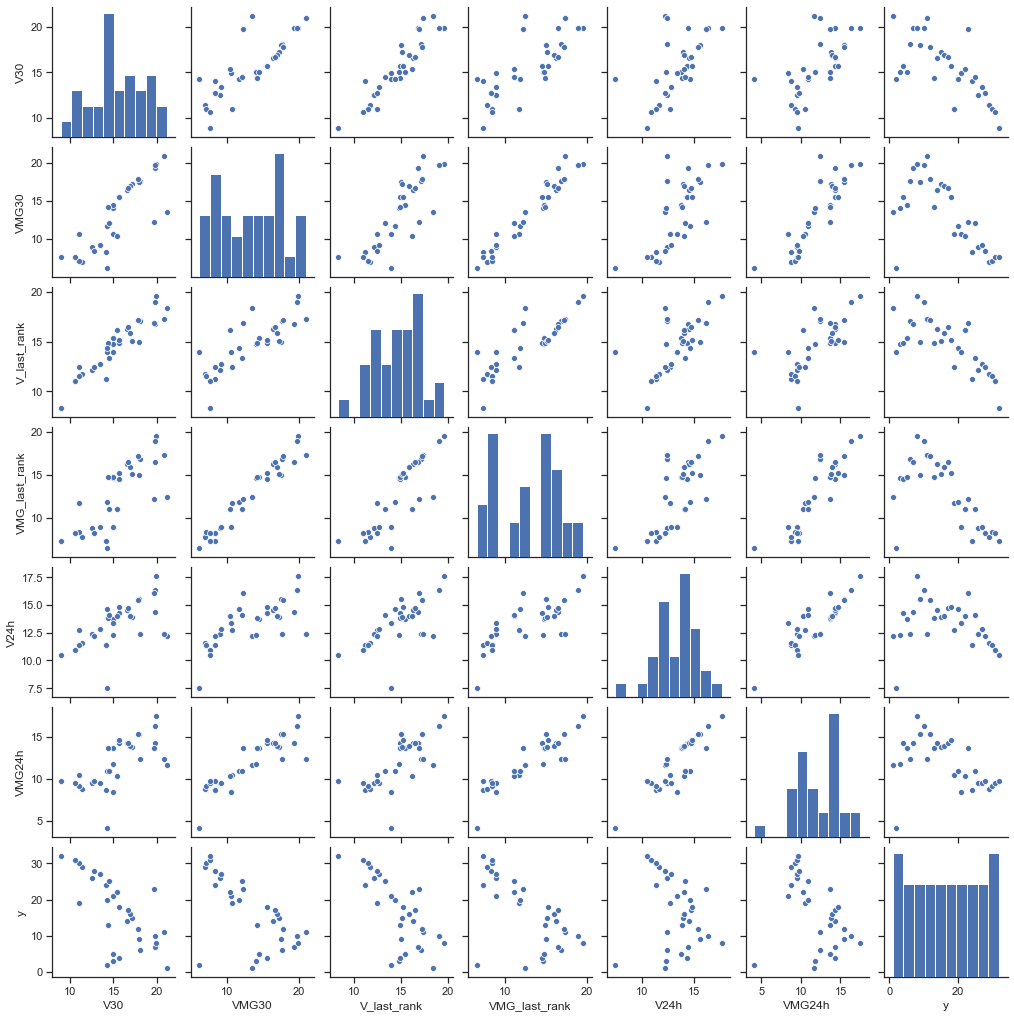

In [151]:
sns.set(style="ticks")
df_X_Y = pd.DataFrame(X_matrix_speed, columns = ['V30', 'VMG30', 'V_last_rank','VMG_last_rank', 'V24h', 'VMG24h' ])
df_X_Y['y'] = Y_ranking
sns.pairplot(df_X_Y, height = 2.0)
plt.show()

La corrélation permet d'identifier s'il existe un lien entre deux variables X et Y où X et Y peuvent se permuter. On calcule la corrélation de Pearson : indice qui permet de réfleter une relation linéaire entre les deux variables. 

$$ r_{Pearson}(X, Y) = \frac{cov(X,Y)}{\sqrt{var(X)} * \sqrt{var(Y)} } $$

In [152]:
df_X_Y.corr(method = 'pearson')

,V30,VMG30,V_last_rank,VMG_last_rank,V24h,VMG24h,y
V30,1.000000,0.817339,0.925760,0.757564,0.578978,0.648246,-0.682312
VMG30,0.817339,1.000000,0.819816,0.972161,0.698081,0.874706,-0.644929
V_last_rank,0.925760,0.819816,1.000000,0.837934,0.651775,0.701209,-0.715962
VMG_last_rank,0.757564,0.972161,0.837934,1.000000,0.730952,0.908035,-0.642805
V24h,0.578978,0.698081,0.651775,0.730952,1.000000,0.869506,-0.204330
VMG24h,0.648246,0.874706,0.701209,0.908035,0.869506,1.000000,-0.431696
y,-0.682312,-0.644929,-0.715962,-0.642805,-0.204330,-0.431696,1.000000


#### Régression linéaire entre le classement et les différentes vitesses 

La régression linéaire fait la liaison entre les variables X et Y mais elles ne peuvent être permutées : X étant la variable explicative et Y la variable à expliquer. En d'autres termes, X est la variable indépendante et Y la variable dépendante. 

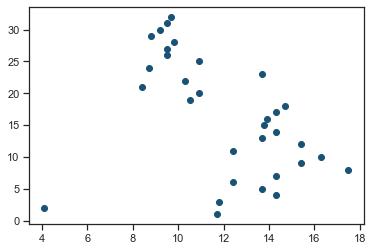

In [153]:
#-------------Préparation des données---------------#

#On récupère la VMG disponible depuis 24h (ici on aurait pu prendre une autre VMG).

X_VMG_24 = X_matrix_speed [:,-1] 
plt.scatter(X_VMG_24,Y_ranking, c="#1A5276")

In [154]:
#----------------Modèle de régression linéaire--------------# 
model = linear_model.LinearRegression()
model.fit(X_VMG_24.reshape(-1,1), Y_ranking)

print(model.coef_, model.intercept_)

[-1.40634802] 33.34980718638001


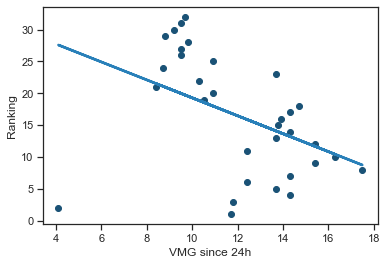

In [155]:
plt.scatter(X_VMG_24,Y_ranking, c="#1A5276") 
plt.plot(X_VMG_24,model.predict(X_VMG_24.reshape(-1,1)), c = "#2980B9",linewidth = 2.5)
plt.xlabel("VMG since 24h")
plt.ylabel("Ranking")
plt.show()


*Attention* On devrait normalement retrouver le résultat suivant : les voiliers les mieux classés devait avoir les vitesse VMG les plus importantes. Ce résultat était vrai jusqu'au 24.

25 novembre, rebondissement: l'un des foils d'un des favoris de la course se fissure à plusieurs endroits. Le skipper Thomas Ruyant est ne bénéficie plus de l'avantage du foil bâbord (cf.partie ci-dessous). Le bateau reste le en deuxième position et continue la course. Le coureur se repose alors sur son foil tribord qui est "statistiquement le plus important du monde" (source: https://www.sports.fr/voile/vendee-globe/vendee-globe-cest-lhecatombe-401045.html#item=2) 

26 novembre: les vitesses des meilleurs classés sont relativement faibles. Serait-il possible que ce soit lié à leur position ? Nous analyserons leurs positions

La vitesse du dernier classé Jémérie Beyou avec son voilier Charal est une des meilleures vitesses enregistrées depuis 24h. Faisant parti des favoris, ce dernier est retourné au point de départ un peu après le lancement de la course suite à des problèmes mécaniques. Il essaye sûrement de rattraper le retard accumulé par ce premier épisode de malchance. 

Il y a également une remontée du skipper Sébastien Simon (voilier Arkéa-Paprec)... à suivre


### Impact de la présence d'un foil sur le classement et la vitesse des voiliers 

La présence du foil est retrouvée dans table_features dans la colonne nommée Nombre de dérives. N'étant pas une passionnée de voiles, des petites recherches s'imposent sur ce qu'est un foil. 

foil : Plan porteur inclinable destiné aux embarcations susceptibles de déjauger (source : Larousse https://www.larousse.fr/dictionnaires/francais/foil/34369)

Un foil est un aileron incurvé placé sous une coque pouvant porter un bateau capable de déjauger. 

En d'autres termes, le foil est un appendice latéral élevant la coque au dessus de l'eau qui permet d'atteindre des pointes de vitesse. *Plus le vent est fort, plus les appendices (quilles ou foils), plus le bateau s'allège et gagne en vitesse et le bateau se soulève*  (source: Ouest France: https://www.ouest-france.fr/vendee-globe/vendee-globe-mais-au-fait-a-quoi-servent-les-foils-7044144).

Nous allons croire sur parole le média Ouest France sur l'avantage donné par un foil aux navires qui en sont composés. 

Nous remarquons dans les fiches techniques des différents voiliers que l'information sur le foil est intégrées dans la catégorie dérives. 

Qu'est ce qu'une dérive ? 
La dérive est une surface portante immergée permettant de résister à la dérive i.e. le dérapage latéral dû à l'effet du vent.  Le mot "dérive" est une contraction du terme plan anti-dérive. (source Wikipédia : https://fr.wikipedia.org/wiki/Dérive_(bateau).

Les foils qui prennent également part dans le monde du surf : https://www.dailymotion.com/video/x7xa55o


In [156]:
table_features

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper
NEWREST - ART & FENÊTRES,fra 56,"no way back, vento di sardegna",vplp/verdier,persico marine,2015-08-01,18.28,5.85,4.5,7.0,foils,29.0,monotype,320.0,570.0,Fabrice amedeo
PURE - Best Western®,fra 49,"gitana eighty, synerciel, newrest-matmut",bruce farr design,southern ocean marine (nouvelle zélande),2007-03-08,18.28,5.80,4.5,9.0,2,28.0,acier forgé,280.0,560.0,Romain attanasio
TSE - 4MYPLANET,fra72,"famille mary-etamine du lys, initiatives coeur...",marc lombard,mag france,1998-03-01,18.28,5.54,4.5,9.0,2,29.0,acier,260.0,580.0,Alexia barrier
Maître CoQ IV,17,safran 2 - des voiles et vous,verdier - vplp,cdk technologies,2015-03-12,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0,Yannick bestaven
CHARAL,08,NaN,vplp,cdk technologies,2018-08-18,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0,Jérémie beyou
LA MIE CÂLINE - ARTISANS ARTIPÔLE,fra 14,"ecover3, président, gamesa, kilcullen voyager-...",owen clarke design llp - clay oliver,hakes marine - mer agitée,2007-08-03,18.28,5.65,4.5,7.9,foils,29.0,basculante avec vérin,300.0,610.0,Arnaud boissieres
BUREAU VALLEE 2,18,banque populaire viii,verdier - vplp,cdk technologies,2015-06-09,18.28,5.80,4.5,7.6,foils,28.0,acier,300.0,600.0,Louis burton
ONE PLANET ONE OCEAN,esp 33,kingfisher - educacion sin fronteras - forum m...,owen clarke design,martens yachts,2000-02-02,18.28,5.30,4.5,8.9,2,26.0,acier,240.0,470.0,Didac costa
GROUPE SÉTIN,fra 71,"paprec-virbac2, estrella damm, we are water, l...",bruce farr yacht design,southern ocean marine (nouvelle-zélande),2007-02-02,18.28,5.80,4.5,9.0,2 asymétriques,28.5,basculante sur vérin hydraulique,270.0,560.0,Manuel cousin
BANQUE POPULAIRE X,fra30,macif - sma,verdier - vplp,cdk - mer agitée,2011-03-01,18.28,5.70,4.5,7.7,2,29.0,acier forgé,340.0,570.0,Clarisse cremer


#### Prise en compte de la présence de foils sur les voiliers

In [157]:
foils_str = table_features["Nombre de dérives"]
foils_str

NEWREST - ART & FENÊTRES                       foils
PURE - Best Western®                               2
TSE -  4MYPLANET                                   2
Maître CoQ IV                                  foils
CHARAL                                         foils
LA MIE CÂLINE - ARTISANS ARTIPÔLE              foils
BUREAU VALLEE 2                                foils
ONE PLANET ONE OCEAN                               2
GROUPE SÉTIN                          2 asymétriques
BANQUE POPULAIRE X                                 2
APIVIA                                         foils
INITIATIVES-COEUR                              foils
MERCI                                              2
OMIA - WATER FAMILY                                2
PRB                                            foils
Compagnie du Lit / Jiliti                          2
MEDALLIA                                           2
SEAEXPLORER - YACHT CLUB DE MONACO             foils
STARK                                         

Dans le vecteur_foil, les données prennent trois valeurs : 
 - 'foils' : présence d'au moins 2 foils sur le voilier 
 - '2' : 2 étant le nombre de dérives sur le voilier
 - 'foiler'
 
Un foiler est un voilier monocoque ou multicoque qui utilise la portance dynamique de plusieurs foils (source : Wikipédia https://fr.wikipedia.org/wiki/Foiler)

On ne considère pas les modèles de dérive-foil, et on suppose que les valeurs numériques représentent le nombre de dérives et par conséquent la non présence de foils sur le bateau. 

In [158]:
vecteur_foil = foils_str.to_numpy()
vecteur_foil

array(['foils', '2', '2', 'foils', 'foils', 'foils', 'foils', '2',
       '2 asymétriques', '2', 'foils', 'foils', '2', '2', 'foils', '2',
       '2', 'foils', '2', 'foils', '2', 'foils', '2', 'foils', 'foils',
       'foils', '2', 'foils', 'foiler', '2', 'foils', 'foils', 'foils'],
      dtype=object)

Pour permettre l'analyse prenant en compte la présence de foils sur un voilier, on construit un vecteur à valeur binaire qui prend les valeurs suivantes:  
- 1 si présence de foils sur le voilier
- 0 sinon. 


In [159]:
#------------Nettoyage du vecteur_foil---------#
foils = []

for f in vecteur_foil: 
    if (f == 'foils') or (f == 'foiler'):
        #le voilier est composé de foils
        foils.append(1)
    else:
        #le voilier n'est composé que de dérives 
        foils.append(0)
print(foils)     

[1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1]


In [160]:
df_foils = pd.DataFrame (foils_str)
df_foils ['foils'] = foils
df_foils.reset_index(level = 0, inplace = True)
df_foils['index'] = df_foils['index'].apply(lambda x : x.capitalize())
table_name_dfoils = df_foils['index']

In [161]:
table_name_dfoils

0               Newrest - art & fenêtres
1                   Pure - best western®
2                       Tse -  4myplanet
3                          Maître coq iv
4                                 Charal
5      La mie câline - artisans artipôle
6                        Bureau vallee 2
7                   One planet one ocean
8                           Groupe sétin
9                     Banque populaire x
10                                Apivia
11                     Initiatives-coeur
12                                 Merci
13                  Omia - water family 
14                                   Prb
15             Compagnie du lit / jiliti
16                              Medallia
17    Seaexplorer - yacht club de monaco
18                                 Stark
19                                 Macsf
20                           Yes we cam!
21                       Time for oceans
22                    Campagne de france
23                        Prysmian group
24              

In [162]:
df_rank = pd.DataFrame(boat_ranking, columns = ['Bateau'])
df_rank['index'] = df_rank['Bateau'].apply(lambda x: x.capitalize())
df_rank['rank'] = df_rank.index
table_name_drank = df_rank['index']
del df_rank['Bateau']

In [163]:
dico_name = {}

for name in table_name_dfoils: 
    if name == 'Groupe sétin': 
        dico_name[name] = 'Groupe sétin'
        
    elif name == 'Groupe apicil':
        dico_name[name] = 'Groupe apicil'
    else: 
        
        debut = name[:4]

    
        for name_rank in table_name_drank: 
            if(debut.capitalize() == (name_rank[:4]).capitalize()):
                dico_name[name] = name_rank
                break
            
dico_name

{'Newrest - art & fenêtres': 'Newrest - art et fenetres',
 'Pure - best western®': 'Pure - best western hotels and resorts',
 'Tse -  4myplanet': 'Tse - 4myplanet',
 'Maître coq iv': 'Maître coq iv',
 'Charal': 'Charal',
 'La mie câline - artisans artipôle': 'La mie câline - artisans artipôle',
 'Bureau vallee 2': 'Bureau vallée 2',
 'One planet one ocean': 'One planet one ocean',
 'Groupe sétin': 'Groupe sétin',
 'Banque populaire x': 'Banque populaire x',
 'Apivia': 'Apivia',
 'Initiatives-coeur': 'Initiatives - coeur',
 'Merci': 'Merci',
 'Omia - water family ': 'Omia - water family',
 'Prb': 'Prb',
 'Compagnie du lit / jiliti': 'Compagnie du lit - jiliti',
 'Medallia': 'Medallia',
 'Seaexplorer - yacht club de monaco': 'Seaexplorer - yacht club de monaco',
 'Stark': 'Stark',
 'Macsf': 'Macsf',
 'Yes we cam!': 'Yes we cam !',
 'Time for oceans': 'Time for oceans',
 'Campagne de france': 'Campagne de france',
 'Prysmian group': 'Prysmian group',
 'La fabrique': 'La fabrique',
 'Linke

In [164]:
print(len(dico_name))

33


In [165]:
for cle, valeur in dico_name.items():
    df_foils= df_foils.replace(cle, valeur)

In [166]:
df_foils

,index,Nombre de dérives,foils
0,Newrest - art et fenetres,foils,1
1,Pure - best western hotels and resorts,2,0
2,Tse - 4myplanet,2,0
3,Maître coq iv,foils,1
4,Charal,foils,1
5,La mie câline - artisans artipôle,foils,1
6,Bureau vallée 2,foils,1
7,One planet one ocean,2,0
8,Groupe sétin,2 asymétriques,0
9,Banque populaire x,2,0


In [167]:
df_merge_rank = pd.merge(df_rank, df_foils, on = ['index'])

Le vecteur foils contient l'information pour tous les voiliers même ceux qui ont abandonné. 
On va donc supprimer les informations non nécessaire grâce au vecteur abandon qui recense les indices des voiliers/skippers ayant quitter la course.

In [168]:
print("Pour l'instant,", len(abandon), " skipper(s) a/ont abandonné l'aventure.")

Pour l'instant, 1  skipper(s) a/ont abandonné l'aventure.


In [169]:
#----------Suppression dans le dataframe---------#
for i in range(len(abandon)):
    df_merge_rank.drop(abandon[i], inplace = True)

In [170]:
df_merge_rank

,index,rank,Nombre de dérives,foils
0,Apivia,0,foils,1
1,Linkedout,1,foils,1
2,Yes we cam !,2,2,0
3,Maître coq iv,3,foils,1
4,Prb,4,foils,1
5,Seaexplorer - yacht club de monaco,5,foils,1
6,Arkea paprec,6,foiler,1
7,Bureau vallée 2,7,foils,1
8,Initiatives - coeur,8,foils,1
9,Prysmian group,9,foils,1


In [171]:
len(X_VMG_24)

32

#### Impact de la présence d'un foil sur le classement et la vitesse du voiliers

Comme précédemment on utilise la VMG et la vitesse du bateau disponible depuis 24 heures, ainsi que du dernier classement disponible.  

On est dans le cas de variables qualitatives pour l'analyse des foils, i.e. qu'une variable ne prend que des modalités discrètes 

Il est possible d'étudier la relation entre une variables quantitative, ici la vitesse du voilier, et une variable qualitative, ici la présence de foils ou non. On peut représenter la relation graphiquement grâce à des box-plots. 

In [172]:
#------Représentation des données ------#
df_merge_rank['VMG24'] = X_VMG_24
df_merge_rank.drop(['Nombre de dérives'], axis='columns', inplace=True)


In [173]:
df_merge_rank

,index,rank,foils,VMG24
0,Apivia,0,1,11.7
1,Linkedout,1,1,4.1
2,Yes we cam !,2,0,11.8
3,Maître coq iv,3,1,14.3
4,Prb,4,1,13.7
5,Seaexplorer - yacht club de monaco,5,1,12.4
6,Arkea paprec,6,1,14.3
7,Bureau vallée 2,7,1,17.5
8,Initiatives - coeur,8,1,15.4
9,Prysmian group,9,1,16.3


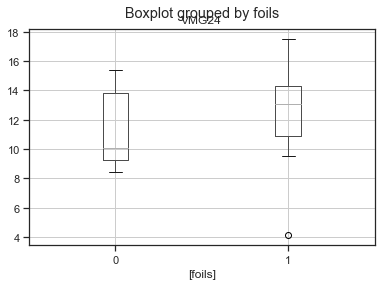

In [174]:
#boxplot : VMG 24 et présence de foils
boxplot = df_merge_rank.boxplot(column = ['VMG24'], by = ['foils'])

Avec les boxplots dessinées, on voit que la médiane de la VMG24 avec foil est supérieure à la médiane de la VMG24 sans foil : ce qui nous laisserait penser à première vue que la présence d'un foil donne une meilleure performance au voilier. 

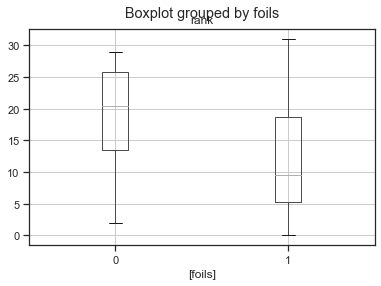

In [175]:
#boxplot : rang et présence de foils 
boxplot = df_merge_rank.boxplot(column = ['rank'], by = ['foils'])

La médiane du classement est meilleure pour les voiliers avec foils que les voiliers sans foil. Cela signifie que les voiliers les mieux classés sont composés de foils. 

## Visualisation de la distance parcourue par un voilier

In [176]:
#---------- Importation de la carte du monde---------# 
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [177]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


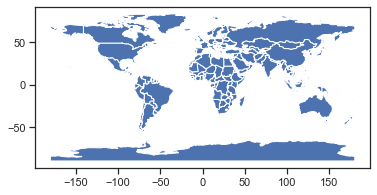

In [178]:
world.plot();

Pour que les trajectoires soient plus lisibles, on se limite aux trois premiers voiliers du classement.

In [179]:
#------------Récupération des trois premiers voiliers--------# 
top_ranking_boat = {}
for i in range(3): 
    top_ranking_boat [i] = df_merge_rank.iloc[i].loc['index']
    
top_ranking_boat

{0: 'Apivia', 1: 'Linkedout', 2: 'Yes we cam !'}

In [180]:
 for cle, value in couple.items(): 
        couple[cle] = dico_name [value]

In [181]:
top_ranking_skipper = {}
cpt= 0

for boat in top_ranking_boat.values(): 
    for cle, value in couple.items(): 
        if (boat == value): 
            top_ranking_skipper[cpt] = cle
            cpt = cpt + 1
top_ranking_skipper

{0: 'Charlie dalin', 1: 'Thomas ruyant', 2: 'Jean le cam'}

Pour avoir une bonne vision des progressions des différents voiliers, 
on récupére les latitudes et longitudes des classements journaliers de 21h. 

In [182]:
#liste des dates des classements disponibles 
date_ss_doublon = []

for date in dates: 
    if date[:8] not in date_ss_doublon: 
        date_ss_doublon.append(date[:8])
date_ss_doublon.reverse()
print(date_ss_doublon)

['20201108', '20201109', '20201110', '20201111', '20201112', '20201113', '20201114', '20201115', '20201116', '20201117', '20201118', '20201119', '20201120', '20201121', '20201122', '20201123', '20201124', '20201125', '20201126', '20201127']


In [183]:
if (now.hour <= 21) : # i.e. que le classement de 21h n'est pas encore disponible
    del date_ss_doublon [-1]

In [184]:
print(date_ss_doublon)

['20201108', '20201109', '20201110', '20201111', '20201112', '20201113', '20201114', '20201115', '20201116', '20201117', '20201118', '20201119', '20201120', '20201121', '20201122', '20201123', '20201124', '20201125', '20201126']


In [185]:
#liste des objets date_time pour récupérer les longitudes et latitudes des dataframes
dates_object = []
for date in date_ss_doublon:
    dates_object.append(datetime.datetime.strptime(date + '21:00', '%Y%m%d%H:%M'))   
print(dates_object)

[datetime.datetime(2020, 11, 8, 21, 0), datetime.datetime(2020, 11, 9, 21, 0), datetime.datetime(2020, 11, 10, 21, 0), datetime.datetime(2020, 11, 11, 21, 0), datetime.datetime(2020, 11, 12, 21, 0), datetime.datetime(2020, 11, 13, 21, 0), datetime.datetime(2020, 11, 14, 21, 0), datetime.datetime(2020, 11, 15, 21, 0), datetime.datetime(2020, 11, 16, 21, 0), datetime.datetime(2020, 11, 17, 21, 0), datetime.datetime(2020, 11, 18, 21, 0), datetime.datetime(2020, 11, 19, 21, 0), datetime.datetime(2020, 11, 20, 21, 0), datetime.datetime(2020, 11, 21, 21, 0), datetime.datetime(2020, 11, 22, 21, 0), datetime.datetime(2020, 11, 23, 21, 0), datetime.datetime(2020, 11, 24, 21, 0), datetime.datetime(2020, 11, 25, 21, 0), datetime.datetime(2020, 11, 26, 21, 0)]


In [186]:
# récupération des longitudes et latitudes des voiliers caractéristiques des bateaux
n1_long = []
n1_lat = []

n2_long = []
n2_lat = []

n3_long = []
n3_lat = []

for date in dates_object: 
    df_temp  = dico_df_ranking[date]
    serie_1 = df_temp.loc[df_temp['Bateau'] == top_ranking_boat[0]]
    serie_2 = df_temp.loc[df_temp['Bateau'] == top_ranking_boat[1]]
    serie_3 = df_temp.loc[df_temp['Bateau'] == top_ranking_boat[2]]
    
    n1_long.append(serie_1.Longitude)
    n1_lat.append(serie_1.Latitude)
    
    n2_long.append(serie_2.Longitude)
    n2_lat.append(serie_2.Latitude)
    
    n3_long.append(serie_3.Longitude)
    n3_lat.append(serie_3.Latitude)


In [187]:
def transfo_objectGPScoord_to_long_lat(list_coordonates): 
    res = []
    for i in list_coordonates: 
        temp = str(i)
        x = re.search("[0-9]{2}°[0-9]{2}.[0-9]{2}'[A-Z]",temp)
        res.append(x.group())
    return res

In [188]:
s1_long = transfo_objectGPScoord_to_long_lat(n1_long)
s1_lat = transfo_objectGPScoord_to_long_lat(n1_lat)
s2_long = transfo_objectGPScoord_to_long_lat(n2_long)
s2_lat = transfo_objectGPScoord_to_long_lat(n2_lat)
s3_long = transfo_objectGPScoord_to_long_lat(n3_long)
s3_lat = transfo_objectGPScoord_to_long_lat(n3_lat)

In [189]:
print(s1_long)

["04°47.42'W", "09°45.33'W", "14°49.51'W", "18°51.12'W", "24°47.85'W", "28°34.67'W", "30°38.11'W", "29°36.17'W", "29°22.05'W", "28°35.02'W", "29°42.46'W", "31°09.94'W", "30°42.82'W", "27°19.63'W", "23°43.82'W", "19°43.52'W", "17°09.03'W", "15°06.14'W", "13°00.37'W"]


In [190]:
def conversion_GPS_longlat(DMS):
    #DMS_lat = 48°51'31.0''N / DMS_long = 2°17'40.2''E
    #les arguments de cette fonction sont des chaines de caractères 
    
    #interpretation des coordonnes
    
    ##partir entière 48 / 2
    ##minutes 51 / 17
    ##secondes 31.0 / 40.2
    ##orientation N / E
    
    #récupération de la partie entière
    index_degree = DMS.find('°')
    partie_entiere = int(DMS[0: index_degree])
    
    #récupération de l'orientation N/S ou O/E
    orientation = DMS[-1]
    
    #récupération des minutes
    index_min = DMS.find(".")
    minute = float(DMS[index_degree + 1: index_min])/60
    
    #récupération des secondes
    index_second = DMS.find("'")
    second = float(DMS[index_min + 1: index_second])/3000
    
    long_lat = partie_entiere + minute + second
   
    #Mise en place de l'orientation 
    if orientation == 'S' or orientation == 'W': 
        long_lat = -1 * long_lat
    

    return long_lat 

In [191]:
Long_1 = [round(conversion_GPS_longlat(x),2) for x in s1_long]
Lat_1 = [round(conversion_GPS_longlat(x),2) for x in s1_lat]
Long_2 = [round(conversion_GPS_longlat(x),2) for x in s2_long]
Lat_2 = [round(conversion_GPS_longlat(x),2) for x in s2_lat]
Long_3 = [round(conversion_GPS_longlat(x),2) for x in s3_long]
Lat_3 = [round(conversion_GPS_longlat(x),2) for x in s3_lat]

In [192]:
#création de dataframes avec les trajectoires des différents skippers
df_trajectoire_skipper1 = pd.DataFrame(
    {'Latitude': Lat_1,
     'Longitude': Long_1})

df_trajectoire_skipper2 = pd.DataFrame(
    {'Latitude': Lat_2,
     'Longitude': Long_2})

df_trajectoire_skipper3 = pd.DataFrame(
    {'Latitude': Lat_3,
     'Longitude': Long_3})

In [193]:
#Définition des geoDataFrame
gdf1 = geopandas.GeoDataFrame(
    df_trajectoire_skipper1, 
    geometry=geopandas.points_from_xy(
        df_trajectoire_skipper1.Longitude, 
        df_trajectoire_skipper1.Latitude))


gdf2 = geopandas.GeoDataFrame(
    df_trajectoire_skipper2, 
    geometry=geopandas.points_from_xy(
        df_trajectoire_skipper2.Longitude, 
        df_trajectoire_skipper2.Latitude))


gdf3 = geopandas.GeoDataFrame(
    df_trajectoire_skipper3, 
    geometry=geopandas.points_from_xy(
        df_trajectoire_skipper3.Longitude, 
        df_trajectoire_skipper3.Latitude))


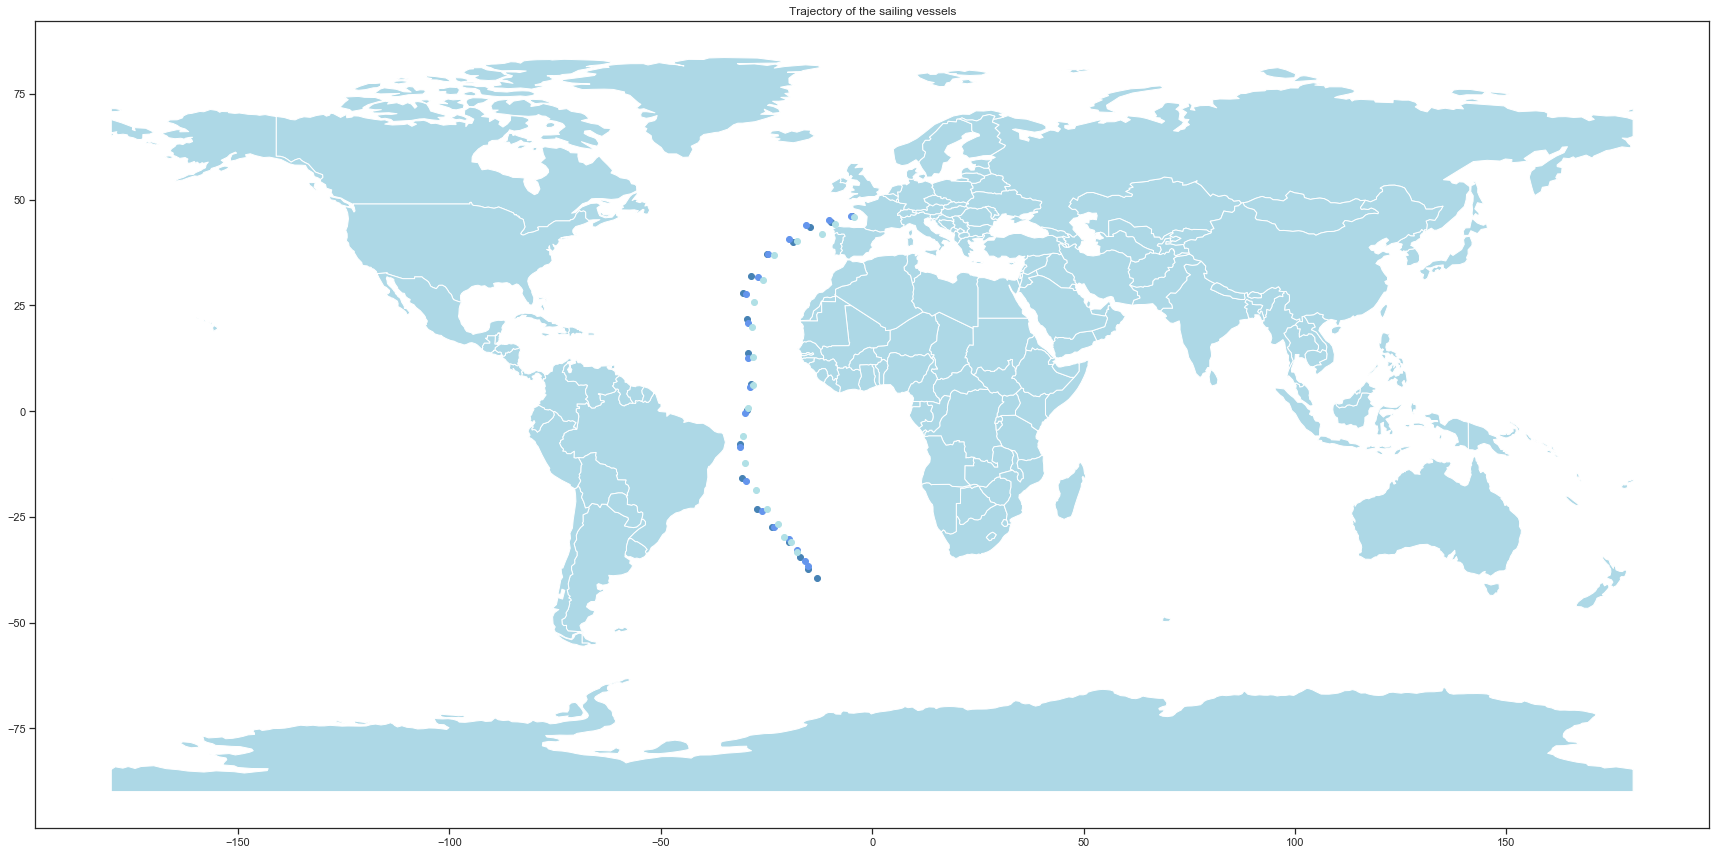

In [194]:
# Figure du monde 
ax = world.plot(figsize = (30,15), color = 'lightblue')

gdf1.plot(ax=ax, color='steelblue')
gdf2.plot(ax=ax, color='cornflowerblue')
gdf3.plot(ax=ax, color='powderblue')

plt.title('Trajectory of the sailing vessels')

plt.show()

Avec le module Geopandas, on peut visualiser facilement la route des prises par les skippers. 
Ici, nous avons fait le choix de nous limiter à 3 voiliers pour une meilleure visualisation. 

Pour faire les projections, j'ai téléchargé le package basemap. Les deux packages Basemap et Geopandas ne sont pas totalement compatibles. 
Le téléchargement de l'un entraine la suppression de fichiers nécessaires pour l'autre. En effet, lors de l'installation de Basemap, le module Geopandas ne marchait plus à cause de la suppression du module CRS de Pyproj. La désinstallation des deux modules ne m'a pas permis de réavoir un module geopandas fonctionnel. Les éléments ci-dessus ont été tirées d'une ancienne machine (où le module géopandas n'a pas été impacté par l'installation du module Basemap). 

**Cette version n'est pas la version définitive du projet** 
Cette version n'a pour but que d'illustrer l'utilisation de Geopandas (sans les soucis de librairies). 